In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-04.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

# Distances Analysis

### Inital view of the data

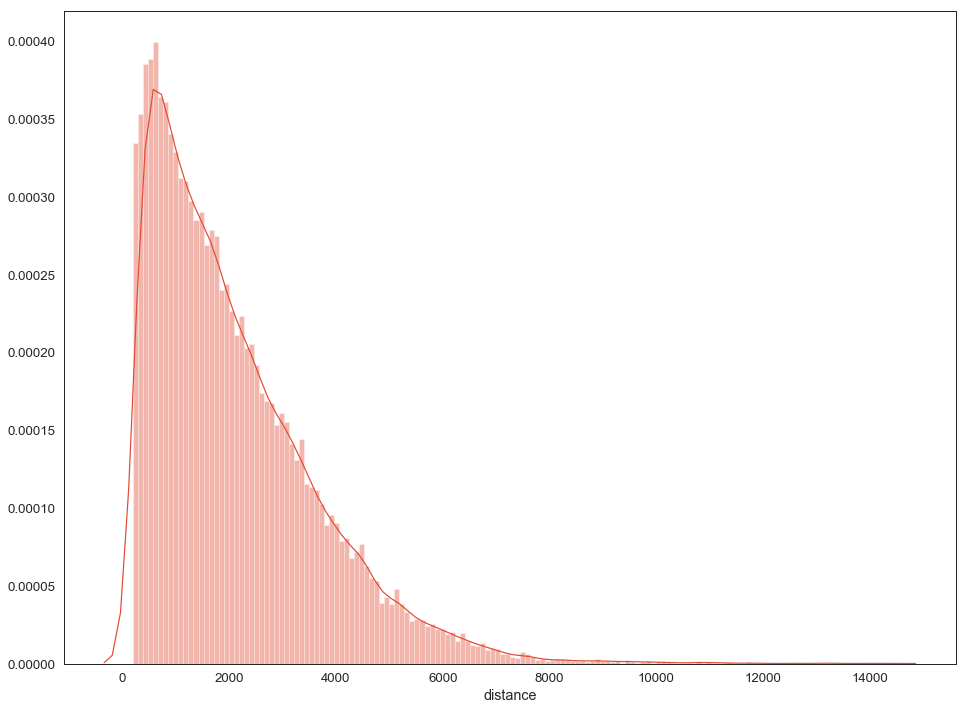

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 150)

In [5]:
distance = df["distance"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
beta,3787.852830,-1.339957e+06,inf,6.814296e-09
gamma,3491.723498,-1.288665e+06,inf,2.110414e-08
burr,3402.813780,-1.211441e+06,inf,1.156864e-07
norm,5176.910117,-1.148703e+06,inf,4.611845e-07
lognorm,3605.341251,-1.074689e+06,inf,2.355427e-06


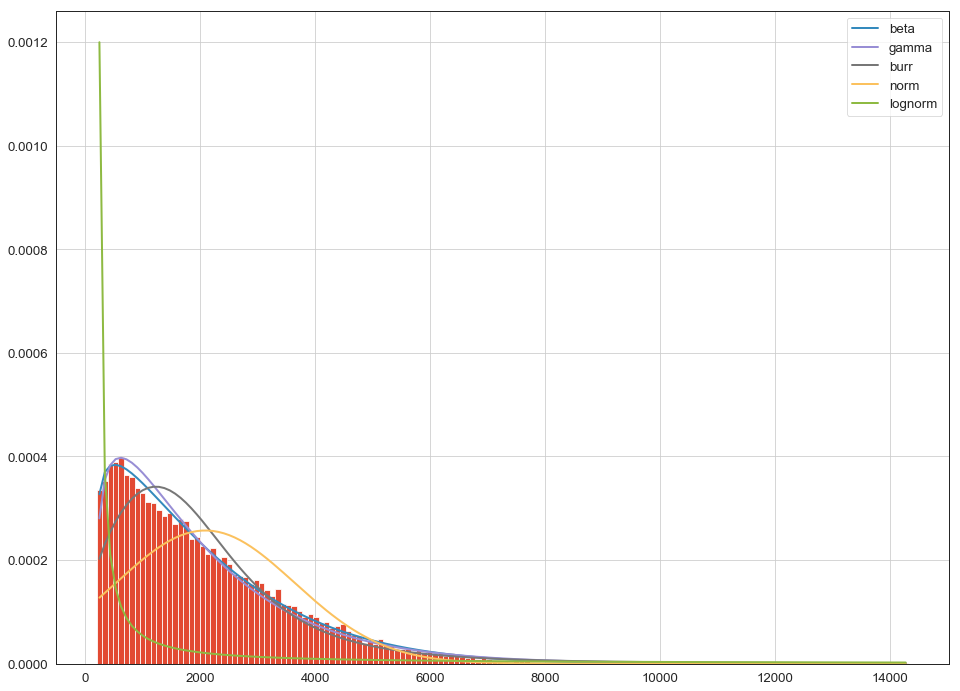

In [6]:
f = Fitter(distance,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=150)
f.fit()
f.summary()

In [7]:
f.get_best(method = 'sumsquare_error')

{'beta': (1.1534723298732663,
  8.99968408595457,
  199.59850557360855,
  16612.3180782771)}

In [8]:
f.get_best(method = 'aic')

{'burr': (2.990624273816412,
  0.4789239384505083,
  -14.087585033474792,
  2612.5481187692867)}

In [9]:
f.get_best(method = 'bic')

{'beta': (1.1534723298732663,
  8.99968408595457,
  199.59850557360855,
  16612.3180782771)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,3787.852830,-1.339957e+06,inf,6.814296e-09
burr,3402.813780,-1.211441e+06,inf,1.156864e-07
norm,5176.910117,-1.148703e+06,inf,4.611845e-07
alpha,3281.238845,-1.126145e+06,inf,7.579593e-07
bradford,2893.798723,-1.111055e+06,inf,1.056946e-06


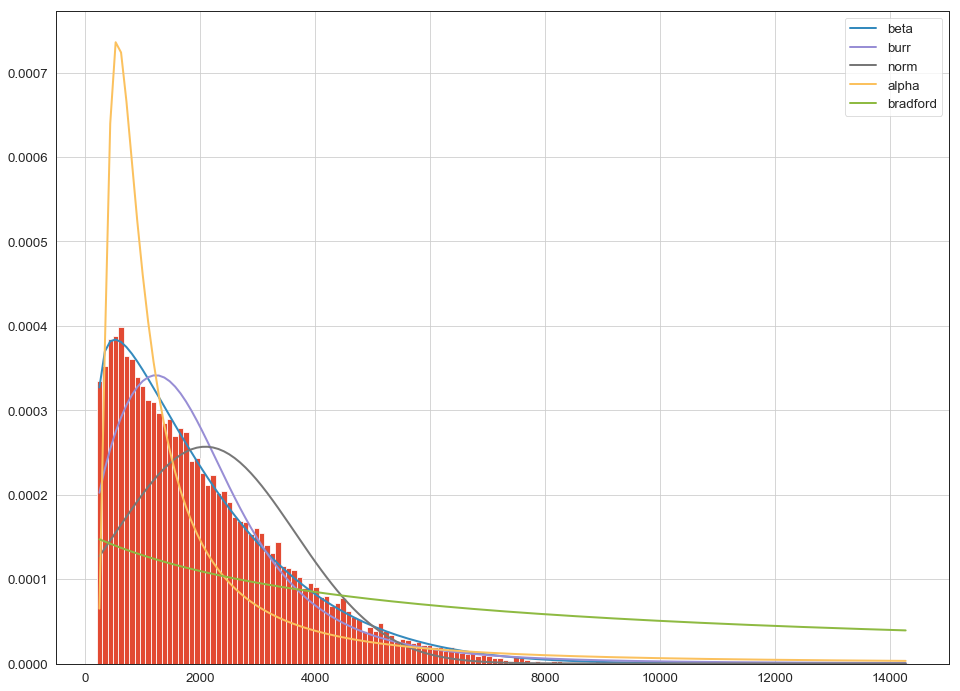

In [10]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
chi2,3491.723515,-1.288665e+06,inf,2.110415e-08
chi,3956.773150,-1.285739e+06,inf,2.250966e-08
expon,3387.834375,-1.221382e+06,inf,9.297297e-08
dgamma,3993.938992,-1.153662e+06,inf,4.133488e-07
cosine,3104.499050,-1.097174e+06,inf,1.435469e-06


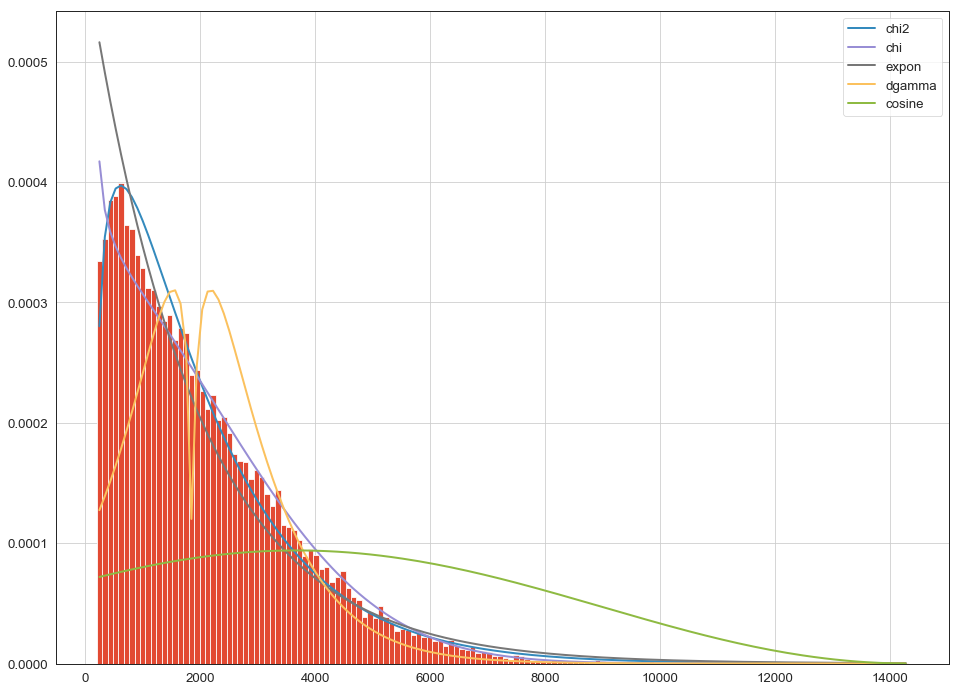

In [11]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gamma,3491.723498,-1.288665e+06,inf,2.110414e-08
fatiguelife,3437.632556,-1.224797e+06,inf,8.621271e-08
exponnorm,3394.718445,-1.218779e+06,inf,9.843787e-08
f,3343.321910,-1.214718e+06,inf,1.076265e-07
fisk,3304.224375,-1.199834e+06,inf,1.494398e-07


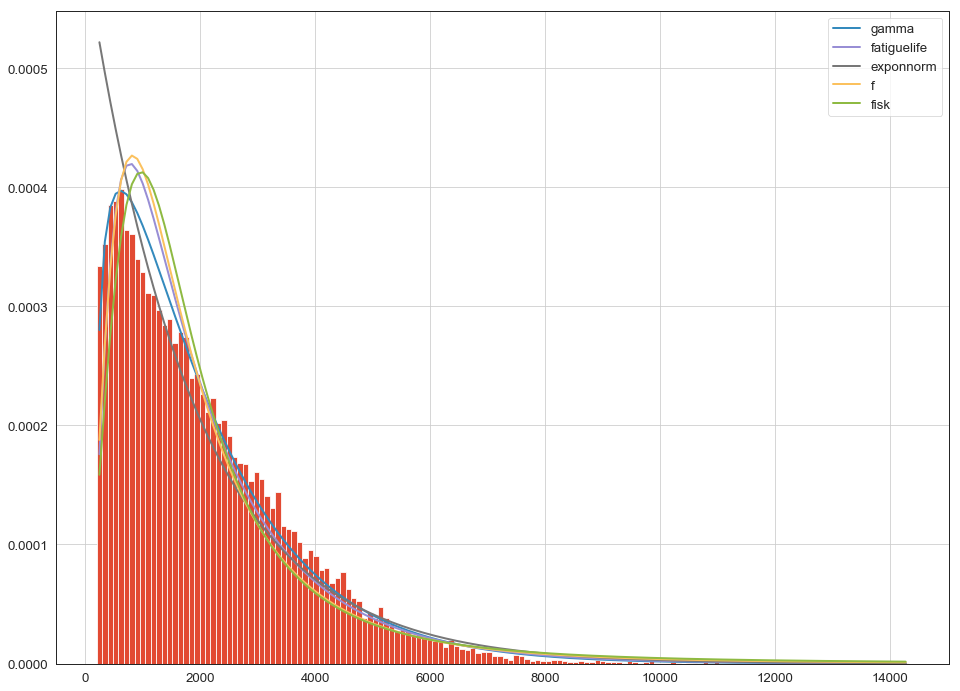

In [12]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
genexpon,3393.625062,-1.221416e+06,inf,9.283628e-08
gengamma,3269.705718,-1.202583e+06,inf,1.406216e-07
levy,3186.540807,-1.152800e+06,inf,4.213734e-07
loggamma,5280.017449,-1.147269e+06,inf,4.758792e-07
lognorm,3605.341251,-1.074689e+06,inf,2.355427e-06


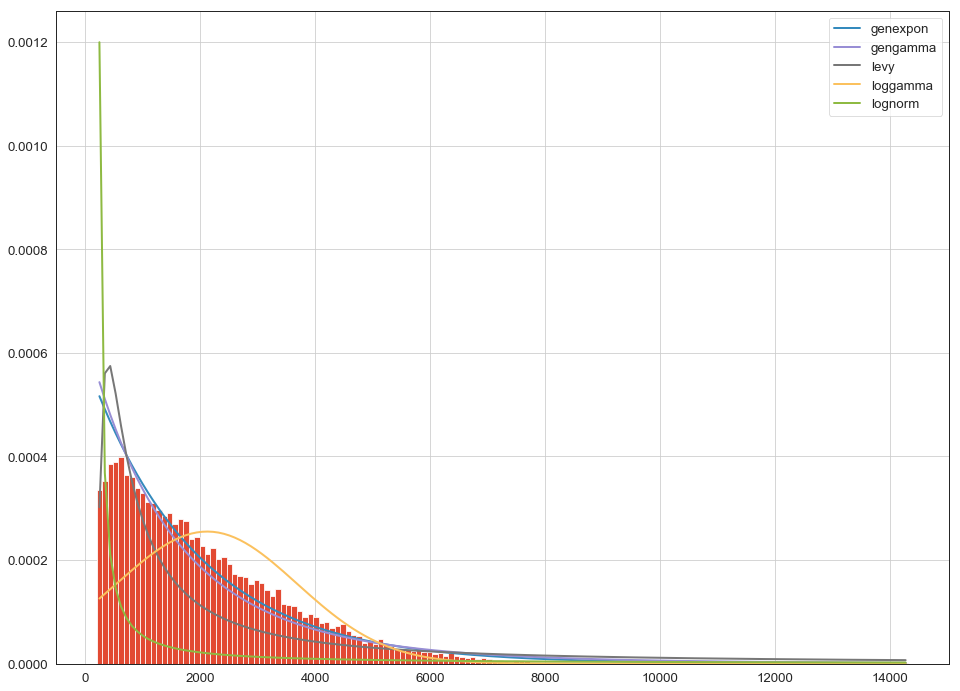

In [13]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
pearson3,3491.723486,-1.288665e+06,inf,2.110414e-08
logistic,4058.231109,-1.154244e+06,inf,4.081806e-07
t,4025.707100,-1.150742e+06,inf,4.408230e-07
powerlaw,2972.497212,-1.114886e+06,inf,9.713831e-07
pareto,3297.690389,-1.058242e+06,inf,3.384261e-06


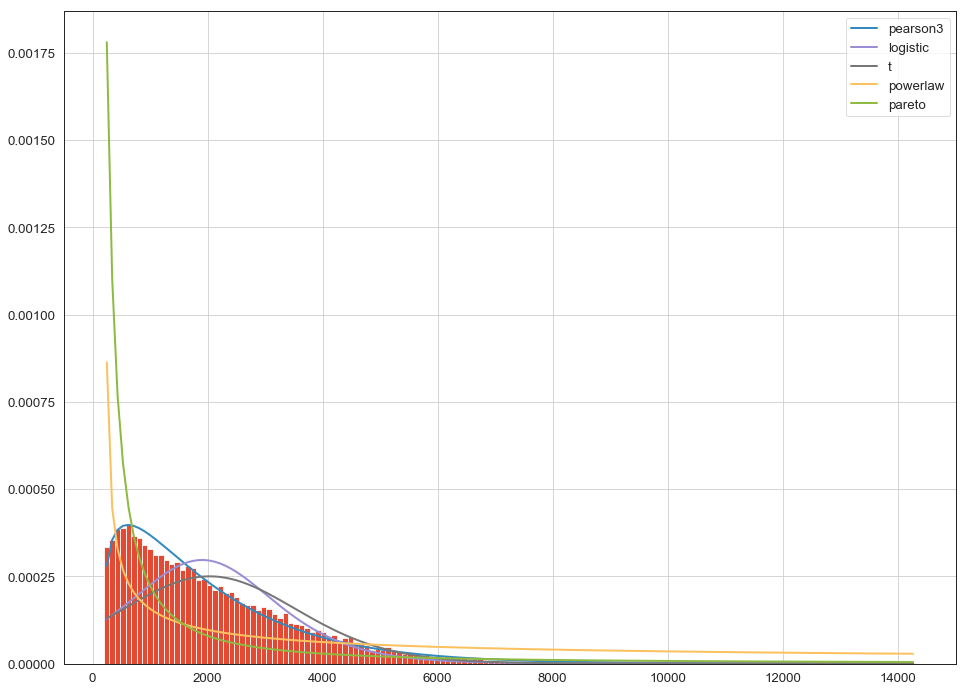

In [14]:
f = Fitter(distance,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins=150)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
beta,3787.852830,-1.339957e+06,inf,6.814296e-09
pearson3,3491.723486,-1.288665e+06,inf,2.110414e-08
gamma,3491.723498,-1.288665e+06,inf,2.110414e-08
chi,3956.773150,-1.285739e+06,inf,2.250966e-08
lognorm,3605.341251,-1.074689e+06,inf,2.355427e-06


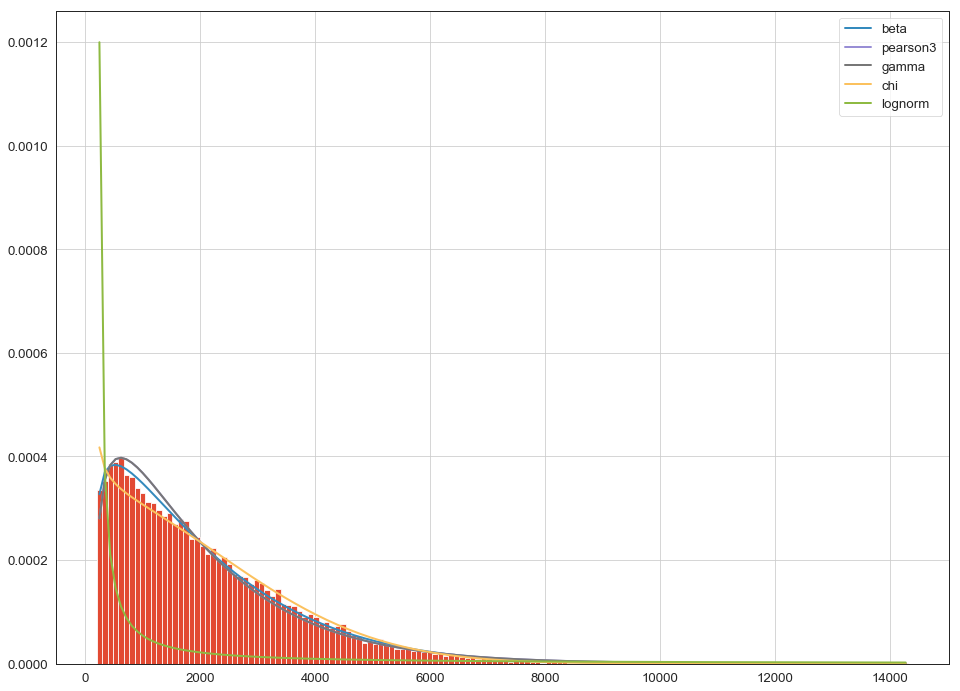

In [15]:
f = Fitter(distance,
           distributions= ['beta','chi','gamma', 'lognorm', 'pearson3'], bins=150)

f.fit()
f.summary()

## Rides Analysis

### Inital view of the data

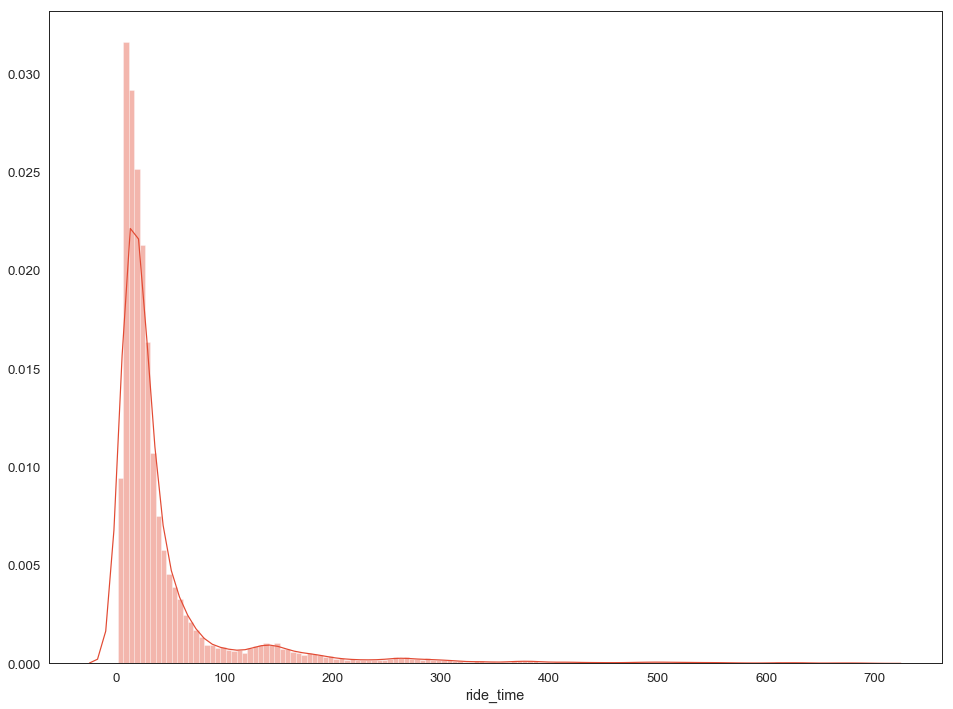

In [16]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 140)

In [17]:
rides = df["ride_time"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
burr,2533.115014,-943320.048633,0.019050,0.000043
lognorm,2673.336424,-880888.603610,0.059370,0.000169
beta,3328.862869,-812263.645645,0.196778,0.000764
gamma,3079.604232,-808333.377088,0.207975,0.000834
norm,4753.938751,-761794.547128,0.738005,0.002325


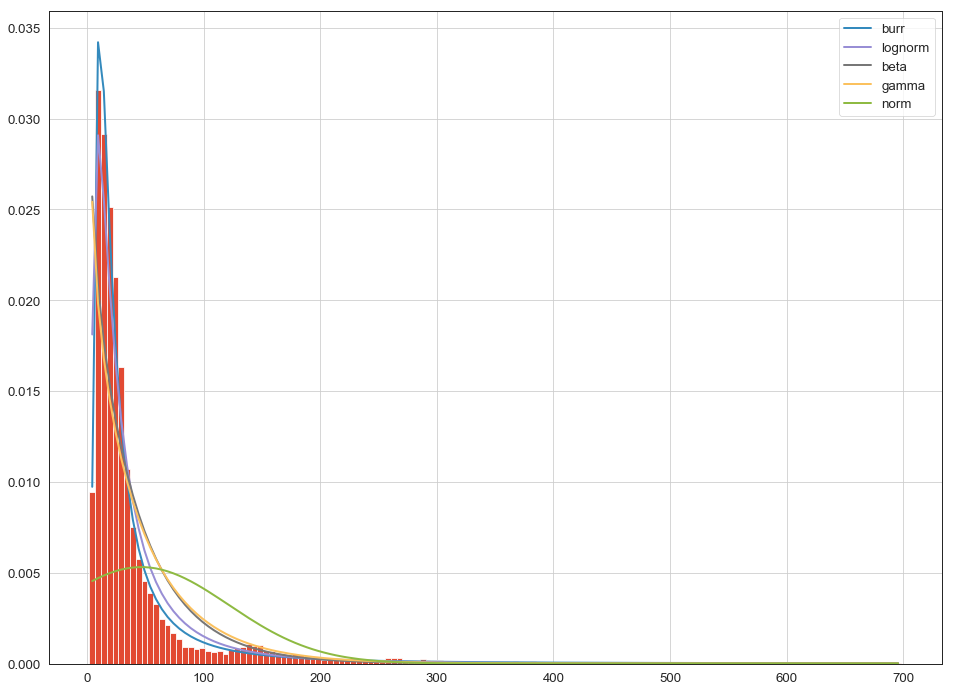

In [18]:
f = Fitter(rides,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins = 140)
f.fit()
f.summary()

In [19]:
f.get_best(method = 'sumsquare_error')

{'burr': (1.3340642358731436,
  10.586378156897219,
  -0.03372083171051485,
  2.9541940248734684)}

In [20]:
f.get_best(method = 'aic')

{'burr': (1.3340642358731436,
  10.586378156897219,
  -0.03372083171051485,
  2.9541940248734684)}

In [21]:
f.get_best(method = 'bic')

{'burr': (1.3340642358731436,
  10.586378156897219,
  -0.03372083171051485,
  2.9541940248734684)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
burr,2533.115014,-943320.048633,0.019050,0.000043
alpha,2467.980517,-866223.950735,0.036677,0.000233
beta,3328.862869,-812263.645645,0.196778,0.000764
norm,4753.938751,-761794.547128,0.738005,0.002325
bradford,1859.548659,-752396.955031,1.643751,0.002860


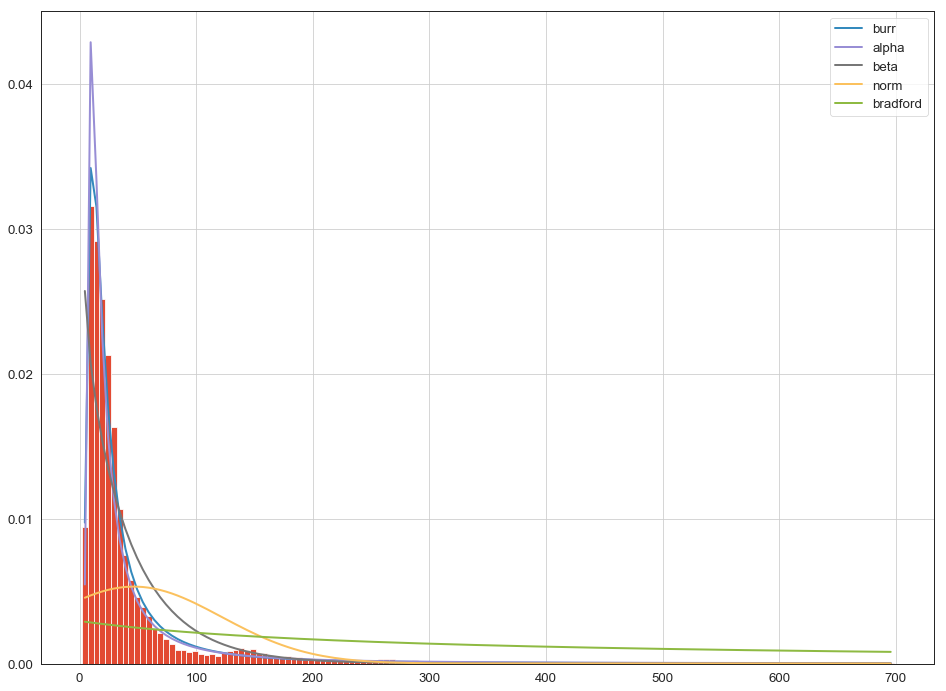

In [22]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
expon,3254.731509,-814751.214632,0.203287,0.000724
dgamma,3254.666150,-814436.541280,0.102628,0.000729
chi2,3093.085939,-808867.266148,0.207196,0.000824
chi,3583.744622,-786437.016923,0.342461,0.001351
cosine,2092.936195,-748271.104858,1.595120,0.003133


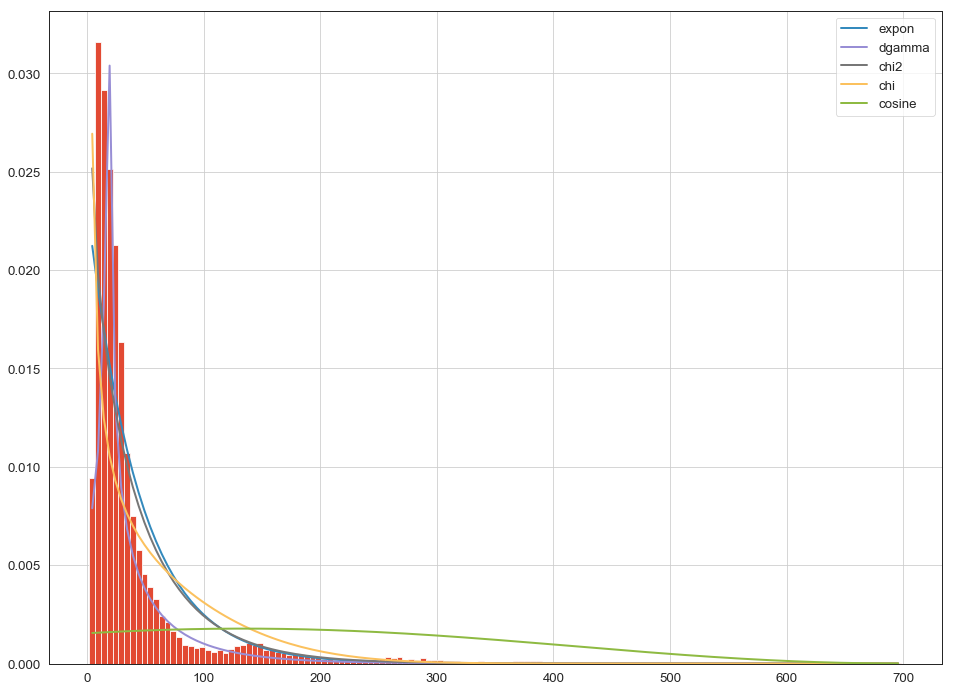

In [23]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
f,2542.321247,-942435.177590,0.020570,0.000043
fisk,2634.867212,-902005.145233,0.041468,0.000106
fatiguelife,2769.497706,-858122.172244,0.097610,0.000278
exponnorm,3361.034404,-835962.134233,0.168903,0.000454
gamma,3079.604232,-808333.377088,0.207975,0.000834


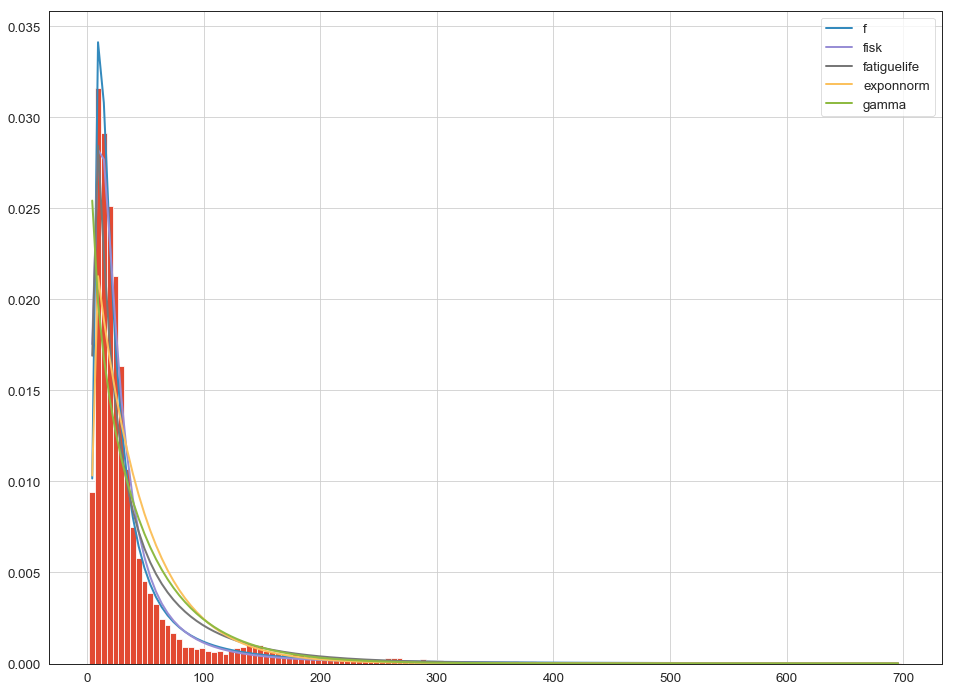

In [24]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
lognorm,2673.336424,-880888.603610,0.059370,0.000169
levy,2240.003178,-816464.783940,0.166735,0.000697
genexpon,3260.737203,-814719.178031,0.203286,0.000724
gengamma,2853.716379,-810080.841633,0.176411,0.000802
loggamma,4504.354720,-760850.785842,0.756803,0.002374


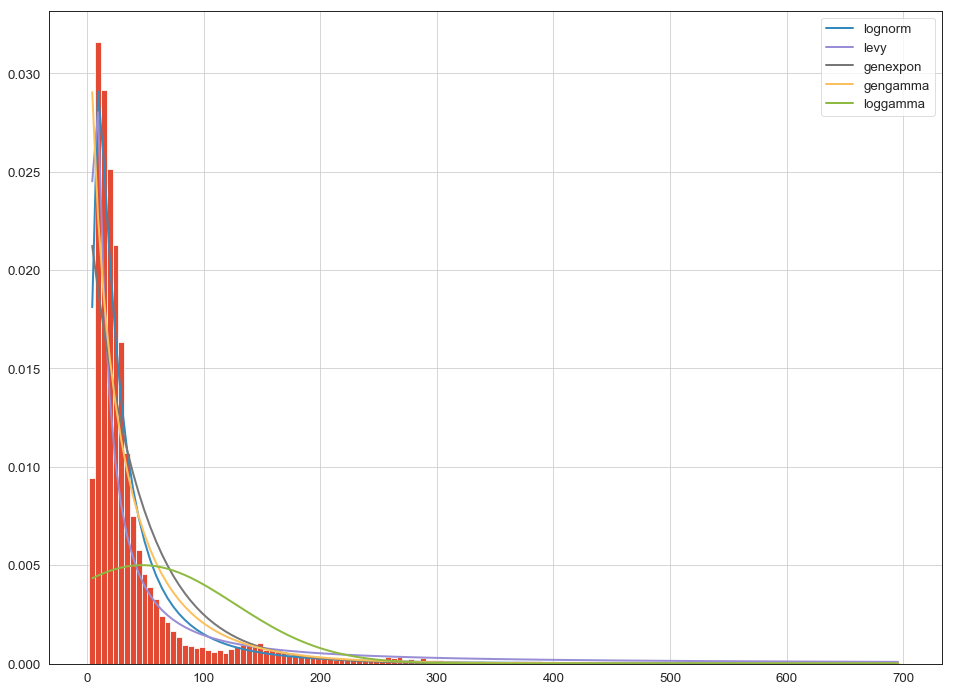

In [25]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
t,2741.602426,-852151.046533,0.070765,0.000317
pearson3,3111.754341,-809457.843910,0.206023,0.000813
logistic,4396.862927,-779761.841511,0.416540,0.001565
powerlaw,1993.813354,-767815.277905,0.845211,0.002036
pareto,2361.304587,-736702.445889,0.625911,0.004041


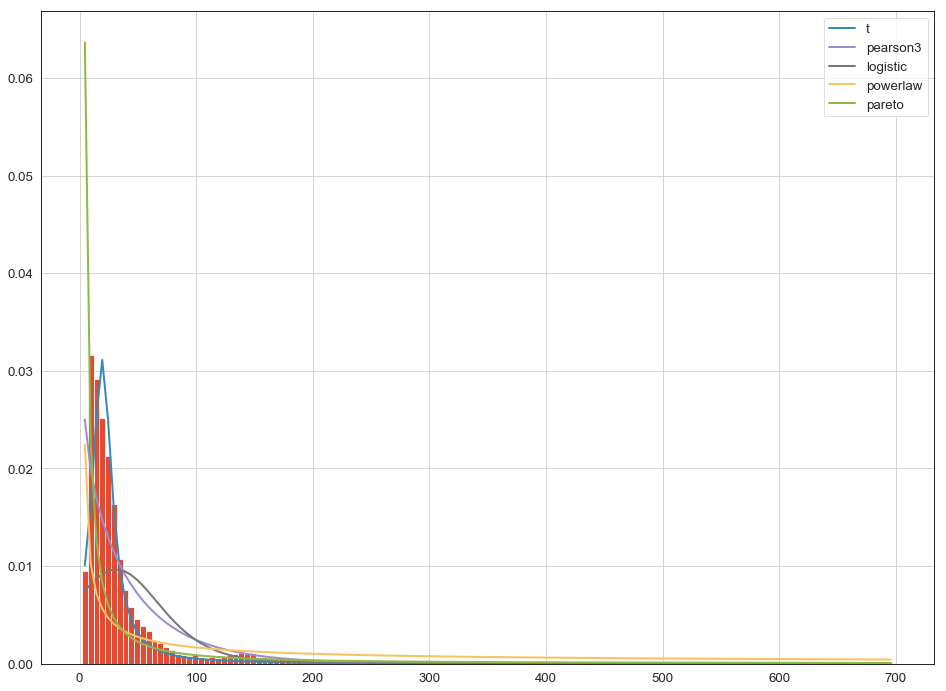

In [26]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins = 140)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
burr,2533.115014,-943320.048633,0.019050,0.000043
f,2542.321247,-942435.177590,0.020570,0.000043
lognorm,2673.336424,-880888.603610,0.059370,0.000169
alpha,2467.980517,-866223.950735,0.036677,0.000233
expon,3254.731509,-814751.214632,0.203287,0.000724


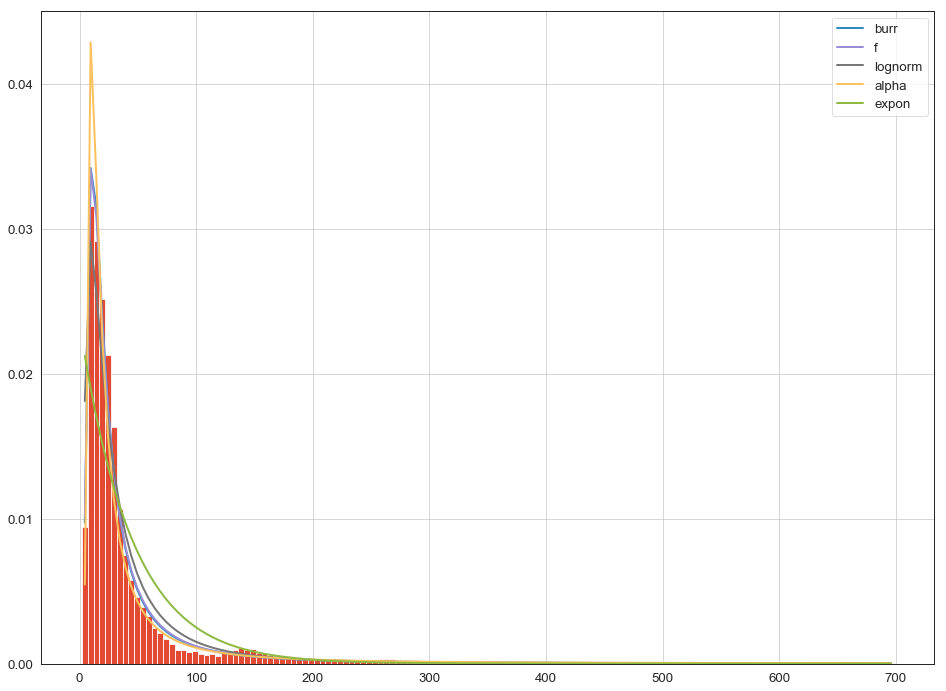

In [27]:
f = Fitter(rides,
           distributions= ['alpha','burr','lognorm', 'expon', 'f'], bins = 140)
f.fit()
f.summary()